# Определение перспективного тарифа для телеком-компании

**Описание проекта**

В нашем распоряжении данные 500 пользователей компании «Мегалайн» — федерального оператора сотовой связи. Про клиентов нам известно: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Компания предлагает два тарифных плана: «Смарт» и «Ультра»

**Цель исследования**

Проанализировав поведение клиентов, сделать вывод - какой тариф приносит больше денег. В ходе исследования проверим следующие гипотезы:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Ход исследования**

 - Обзор данных
 - Предобработка данных
 - Исследовательский анализ данных
 - Проверка гипотез

## Обзор данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Получим первичную информацию о данных, так как в нашем распоряжении 5 датасетов автоматизируем обзор данных с помощью цикла 
calls = pd.read_csv("/datasets/calls.csv")
internet = pd.read_csv("/datasets/internet.csv")
messages = pd.read_csv("/datasets/messages.csv")
tariffs = pd.read_csv("/datasets/tariffs.csv")
users = pd.read_csv("/datasets/users.csv")

for df in [users, calls, internet, messages, tariffs]:
    display('-----------------------------------------------------------------------')
    display(df.info())
    display(df.head())

'-----------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


'-----------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


'-----------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


'-----------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


'-----------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Выводы:**

В нашем распоряжении 5 таблиц с данными, в которых содержится информация о пользователях, звонках, сообщениях, интернет-сессиях и тарифах. В ходе первичного рассмотрения данных можно выделить несколько моментов:
 1) наименования столбцов стилистически корректны
 
 2) пропуски в данных отсутствуют, исключение - столбец `churn_date`, но в документации сказано, что в нём хранится информация о дате прекращения пользования тарифом, и если значение пропущено, то тариф ещё действовал на момент выгрузки данных, поэтому тут ошибок нет.
 
 3) необходимо изменить тип данных в столбцах, где содержатся даты
 
 4) в таблице `internet` есть лишний безымянный столбец
 
 5) в таблице `tariffs` объем бесплатного интернет-трафика представлен в мегабайтах, необходимо перевести в гигабайты согласно описанию тарифов (тариф «Ультра» - 30 Гб, тариф «Смарт» - 15 Гб)

## Предобработка данных

### Изменение типов данных

In [3]:
# Преобразуем тип данных в столбцах с датой
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%dT%H:%M:%S")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%dT%H:%M:%S")
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%dT%H:%M:%S")
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%dT%H:%M:%S")
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%dT%H:%M:%S")

In [4]:
#Так в дальнейшем при анализе нам потребуется информация только о месяце, добавим его в отдельный столбец в таблицы calls, internet и messages
calls['month'] = calls['call_date'].astype('datetime64[M]')
internet['month'] = internet['session_date'].astype('datetime64[M]')
messages['month'] = messages['message_date'].astype('datetime64[M]')

В описании к проекту также сказано, что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Данные в таблицах же представлены в секундах и мегабайтах. По столбцу `duration` преобразуем данные и приведем к нужному типу на этом этапе, по столбцу `mb_used` сделаем это чуть позже, после группировки данных.

In [5]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

In [6]:
# Проверка
for df in [users, calls, internet, messages]:
    display('-----------------------------------------------------------------------')
    display(df.info())

'-----------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

'-----------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 7.7+ MB


None

'-----------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 6.8+ MB


None

'-----------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 3.8+ MB


None

### Проверка данных на дубликаты

In [7]:
# Проверим данные на явные дубликаты
for df in [users, calls, internet, messages]:
    display(df.duplicated().sum())

0

0

0

0

Явных дубликатов нигде нет.

### Проверка данных на аномалии

In [8]:
# Данные в столбце user_id — уникальный идентификатор пользователя, при проверке мы не будем использовать этот столбец.
# Проверим данные из таблицы users, числовые данные содержаться только в столбце age
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Аномалий в данных нет.

In [9]:
# Проверим данные из таблицы calls, числовые данные содержаться только в столбце duration
calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

Text(0, 0.5, 'calls')

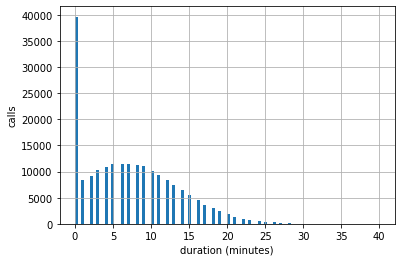

In [10]:
calls['duration'].hist(bins = 100, range = (0,40))
plt.xlabel('duration (minutes)')
plt.ylabel('calls')

Звонки с нулевой продолжительностью - это не ошибка, так как нулями обозначены пропущенные звонки. В целом данные по столбцу правдоподобны, аномалий нет.

In [11]:
# В таблице internet есть лишний безымянный столбец, в котором задублированы индексы  - удалим его
internet = internet.drop('Unnamed: 0', 1)
# Выведем информацию по столбцу mb_used
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Аномалий в данных нет.

### Дополнительные расчёты

Для каждого пользователя рассчитаем:

 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя

In [12]:
# Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам
user_calls = calls.groupby(['user_id', 'month'])['duration'].agg(['count','sum']).reset_index().rename(columns={'count':'calls_count','sum':'calls_total_min'})
# Посчитаем количество отправленных сообщений по месяцам
user_messages = messages.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns={'id':'messages_count'})
# Посчитаем объем израсходованного интернет-трафика по месяцам
user_internet = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index().rename(columns={'mb_used':'internet_total_mb'})
# Переведем данные по интернет-трафику в гигабайты
user_internet['internet_total_gb']=np.ceil(user_internet['internet_total_mb']/1024).astype(int)
# Посчитаем помесячную выручку с каждого пользователя:
# 1) Объединим данные в одну таблицу
user_costs = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
user_costs = user_costs.merge(user_internet, on=['user_id','month'], how='outer')
user_costs = user_costs.merge(users, on='user_id', how='left')
# 2) В таблице tariffs переименуем столбец tariff_name в tariff
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
# 3) В таблице tariffs переведем мегабайты в гигабайты 
tariffs['gb_per_month_included']=np.ceil(tariffs['mb_per_month_included']/1024).astype(int)
user_costs = user_costs.merge(tariffs, on='tariff', how='left')
# 4) Удалим лишние столбцы
user_costs = user_costs.drop(['internet_total_mb','first_name','last_name','churn_date','reg_date','age','mb_per_month_included'],axis = 1)
# 5) Рассчитаем помесячную выручку с каждого пользователя
def income (column):
    calls_cost = (column['calls_total_min'] - column['minutes_included'])*column['rub_per_minute']
    message_cost = (column['messages_count'] - column['messages_included'])*column['rub_per_message']
    internet_cost = (column['internet_total_gb'] - column['gb_per_month_included'])*column['rub_per_gb']
    
    total = 0 
    for i in [calls_cost, message_cost, internet_cost]:
        if i > 0:
            total += i
    return total

user_costs['income'] = (user_costs.apply(income, axis=1)+user_costs['rub_monthly_fee'])
user_costs


,user_id,month,calls_count,calls_total_min,messages_count,internet_total_gb,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,income
0,1000,2018-05-01,22.0,159.0,22.0,3.0,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950.0
1,1000,2018-06-01,43.0,172.0,60.0,23.0,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950.0
2,1000,2018-07-01,47.0,340.0,75.0,14.0,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950.0
3,1000,2018-08-01,52.0,408.0,81.0,14.0,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950.0
4,1000,2018-09-01,58.0,466.0,57.0,15.0,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-09-01,NaN,NaN,32.0,17.0,Санкт-Петербург,smart,50,500,550,200,3,3,15,950.0
3210,1489,2018-10-01,NaN,NaN,21.0,20.0,Санкт-Петербург,smart,50,500,550,200,3,3,15,1550.0
3211,1489,2018-11-01,NaN,NaN,20.0,18.0,Санкт-Петербург,smart,50,500,550,200,3,3,15,1150.0
3212,1489,2018-12-01,NaN,NaN,35.0,17.0,Санкт-Петербург,smart,50,500,550,200,3,3,15,950.0


In [13]:
# Получим информацию по новой таблице
user_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   datetime64[ns]
 2   calls_count            3174 non-null   float64       
 3   calls_total_min        3174 non-null   float64       
 4   messages_count         2717 non-null   float64       
 5   internet_total_gb      3203 non-null   float64       
 6   city                   3214 non-null   object        
 7   tariff                 3214 non-null   object        
 8   messages_included      3214 non-null   int64         
 9   minutes_included       3214 non-null   int64         
 10  rub_monthly_fee        3214 non-null   int64         
 11  rub_per_gb             3214 non-null   int64         
 12  rub_per_message        3214 non-null   int64         
 13  rub

1) Мы видим, что в таблице есть строки с NaN, можно предположить, что клиенты в данном месяце не пользовались услугами, заменим NaN на 0.

2) Заменим тип данных float64 на int64

In [14]:
column = ['calls_count', 'calls_total_min', 'messages_count','internet_total_gb','income']

for i in column:
    user_costs[i] = user_costs[i].fillna(0).astype('int')

In [15]:
# Проверка
user_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   datetime64[ns]
 2   calls_count            3214 non-null   int64         
 3   calls_total_min        3214 non-null   int64         
 4   messages_count         3214 non-null   int64         
 5   internet_total_gb      3214 non-null   int64         
 6   city                   3214 non-null   object        
 7   tariff                 3214 non-null   object        
 8   messages_included      3214 non-null   int64         
 9   minutes_included       3214 non-null   int64         
 10  rub_monthly_fee        3214 non-null   int64         
 11  rub_per_gb             3214 non-null   int64         
 12  rub_per_message        3214 non-null   int64         
 13  rub

Мы привели данные к нужным типам, проверили, что в данных нет дубликатов и аномалий, для дальнейшего анализа рассчитали:

 - количество сделанных звонков и израсходованных минут разговора по месяцам
 - количество отправленных сообщений по месяцам
 - объем израсходованного интернет-трафика по месяцам
 - помесячную выручку с каждого пользователя

## Анализ данных

### Расчёт общих показателей по тарифам за месяц

Найдём сколько минут, сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [16]:
# Для тарифа smart
user_costs_smart = user_costs.query("tariff == 'smart'").groupby(['tariff', 'month'])['calls_total_min', 'messages_count', 'internet_total_gb'].sum().reset_index()
user_costs_smart

,tariff,month,calls_total_min,messages_count,internet_total_gb
0,smart,2018-01-01,6931,620,297
1,smart,2018-02-01,17324,1397,687
2,smart,2018-03-01,30034,2453,1173
3,smart,2018-04-01,41119,3443,1526
4,smart,2018-05-01,54618,4762,2243
5,smart,2018-06-01,64885,5478,2616
6,smart,2018-07-01,82079,6784,3191
7,smart,2018-08-01,99045,7905,3933
8,smart,2018-09-01,111439,8746,4262
9,smart,2018-10-01,125284,9927,4963


In [17]:
# Для тарифа ultra
user_costs_ultra = user_costs.query("tariff == 'ultra'").groupby(['tariff', 'month'])['calls_total_min', 'messages_count', 'internet_total_gb'].sum().reset_index()
user_costs_ultra

,tariff,month,calls_total_min,messages_count,internet_total_gb
0,ultra,2018-01-01,3853,304,119
1,ultra,2018-02-01,7131,527,288
2,ultra,2018-03-01,18117,1195,653
3,ultra,2018-04-01,25191,1736,933
4,ultra,2018-05-01,34192,2536,1298
5,ultra,2018-06-01,40295,3505,1591
6,ultra,2018-07-01,49667,4536,1866
7,ultra,2018-08-01,54653,5183,2097
8,ultra,2018-09-01,62036,6013,2213
9,ultra,2018-10-01,68644,7187,2468


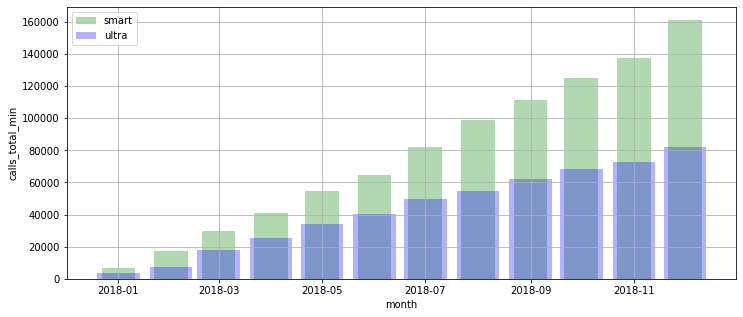

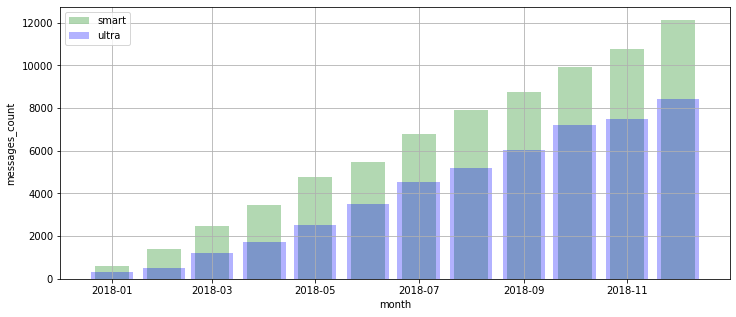

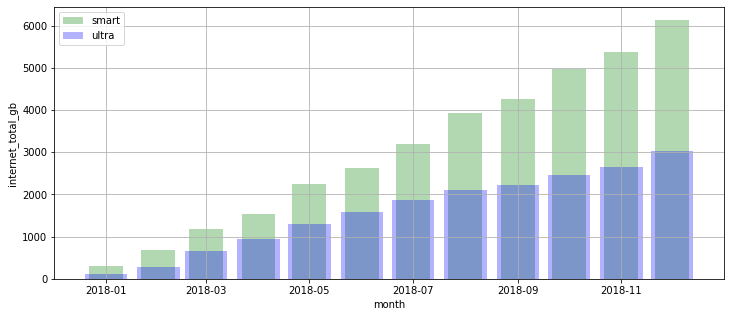

In [18]:
# Построим диаграммы
for column in ['calls_total_min', 'messages_count', 'internet_total_gb']:
    plt.figure(figsize=(12, 5))
    plt.bar(user_costs_smart['month'], user_costs_smart[column], label='smart', color='g', alpha=0.3, width=20)
    plt.bar(user_costs_ultra['month'], user_costs_ultra[column], label='ultra', color='b', alpha=0.3, width=25)

    plt.xlabel('month')
    plt.ylabel(column)
    plt.grid()
    plt.legend()
    plt.show()

**Проанализиров графики, можно сделать следующие выводы:**

1) по обоим тарифам наблюдается тенденция к увеличению объема используемых услуг, возможно, это связано с увеличением количества пользователей

2) месячный расход в абсолютных значениях по тарифу smart превышает расход по тарифу ultra, но это, может быть, связано с тем, что количество пользователей тарифом smart превышает количество пользователей по тарифу ultra


In [19]:
print('Количество пользователей тарифом smart:',len(user_costs.query('tariff =="smart"')['user_id'].unique()))
print('Количество пользователей тарифом ultra:',len(user_costs.query('tariff =="ultra"')['user_id'].unique()))

Количество пользователей тарифом smart: 350
Количество пользователей тарифом ultra: 148


Так и есть пользователей тарифом smart в два раза больше.

Рассчитаем также общую выручку по каждому тарифу за год

In [20]:
print('Общая выручка по тарифу smart:', (user_costs.query('tariff =="smart"')['income'].sum()))
print('Общая выручка по тарифу ultra:', (user_costs.query('tariff =="ultra"')['income'].sum()))

Общая выручка по тарифу smart: 2875351
Общая выручка по тарифу ultra: 2039100


Выручка по тарифу smart примерно на 40% больше, чем по тарифу ultra

### Рассчитаем среднее количество, дисперсию и стандартное отклонение

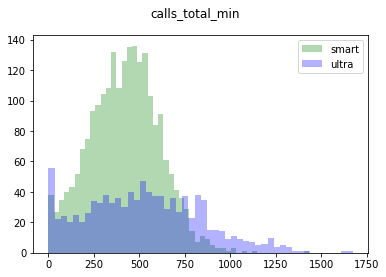

,mean,var,std
,calls_total_min,calls_total_min,calls_total_min
tariff,,,
smart,418.0,36219.0,190.0
ultra,527.0,100874.0,318.0


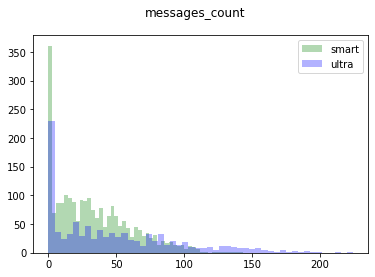

,mean,var,std
,messages_count,messages_count,messages_count
tariff,,,
smart,33.0,797.0,28.0
ultra,49.0,2285.0,48.0


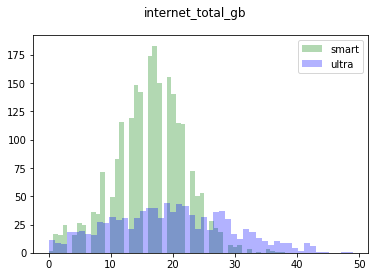

,mean,var,std
,internet_total_gb,internet_total_gb,internet_total_gb
tariff,,,
smart,16.0,33.0,6.0
ultra,19.0,97.0,10.0


In [21]:
user_st_smart = user_costs.query("tariff == 'smart'")
user_st_ultra = user_costs.query("tariff == 'ultra'")

for column in ['calls_total_min', 'messages_count', 'internet_total_gb']:  
    plt.hist(user_st_smart[column],bins=50, label='smart', color='g', alpha=0.3)
    plt.hist(user_st_ultra[column],bins=50, label='ultra', color='b', alpha=0.3)
    plt.legend()
    plt.suptitle(column)
    plt.show()
    display(user_costs.pivot_table(index = 'tariff',values=column,aggfunc = ['mean','var','std']).round())

In [22]:
user_st_smart[['calls_total_min', 'messages_count', 'internet_total_gb','income']].describe().round()

,calls_total_min,messages_count,internet_total_gb,income
count,2229.0,2229.0,2229.0,2229.0
mean,418.0,33.0,16.0,1290.0
std,190.0,28.0,6.0,818.0
min,0.0,0.0,0.0,550.0
25%,282.0,10.0,13.0,550.0
50%,422.0,28.0,17.0,1023.0
75%,545.0,51.0,20.0,1750.0
max,1435.0,143.0,38.0,6770.0


In [23]:
user_st_ultra[['calls_total_min', 'messages_count', 'internet_total_gb','income']].describe().round()

,calls_total_min,messages_count,internet_total_gb,income
count,985.0,985.0,985.0,985.0
mean,527.0,49.0,19.0,2070.0
std,318.0,48.0,10.0,376.0
min,0.0,0.0,0.0,1950.0
25%,284.0,6.0,12.0,1950.0
50%,518.0,38.0,19.0,1950.0
75%,752.0,79.0,27.0,1950.0
max,1673.0,224.0,49.0,4800.0


**Выводы:**
1) Пользователи тарифа smart в среднем практически полностью расходуют предоставляемые минуты в течение месяца, пользователи тарифа ultra ни разу не воспользовались минутами сверх тарифного плана.

2) Большинство пользователей обоих тарифов не используют sms. Если пользователи тарифа smart используют сообщения, то как правило, укладываются в допустимый лимит, пользователи тарифа ultra ни разу не воспользовались sms сверх тарифного плана.

3) Пользователям тарифа smart, как правило, не достаточно включенного в тарифный план интернет-трафика, примерно 50% клиентов использует дополнительный трафик. Пользователи тарифа ultra приобретают дополнительный трафик менее чем в 25% случаях.

4) Средняя выручка по тарифу ultra (2070 руб.) практически на 60% больше, чем выручка по тарифу smart (1290 руб.)

5) Важно отметить, что у тарифа ultra наблюдается больший разброс значений, чем у тарифа smart.

## Проверка гипотез

Проверим две гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем H0 и Н1:

H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается\
H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Уровень статистической значимости зададим равным 5%

In [24]:
alpha = .05

# Будем использовать метод scipy.stats.ttest_ind(), так как нам нужно проверить гипотезу о равенстве среднего двух генеральных совокупностей
results = st.ttest_ind(
    user_st_smart['income'], 
    user_st_ultra['income'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Тест показал, что средняя выручка пользователей у тарафов отличается, так наша первая гипотеза полностью подтвердилась.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем H0 и Н1:

H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов\
H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Уровень статистической значимости зададим равным 5%

In [25]:
alpha = .05

moscow = user_costs.query("city == 'Москва'")['income']
other = user_costs.query("city != 'Москва'")['income']

# Также воспользуемся методом scipy.stats.ttest_ind()
results = st.ttest_ind(
    moscow, 
    other)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Тест показал, что средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов, таким образом, наша вторая гипотеза не подтвердилась.

## Общий вывод

Целью нашего исследования было определение наиболее выгодного для компании тарифа. В первую очередь мы проверили корректность данных и рассчитали дополнительные параметры, далее провели анализ и проверили несколько гипотез. 

Так в ходе исследования, мы пришли к следующим выводам:
- средняя выручка пользователей тарифов ultra и smart различаются, так у тарифа ultra средняя выручка на 60% больше, чем у тарифа smart
- средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов
- количество пользователей тарифом smart в 2 раза больше, чем тарифом ultra
- общая выручка за год по тарифу smart примерно на 40% больше, чем по тарифу ultra
- пользователи тарифа ultra, как правило, не используют полностью предоставляемые лимиты по тарифу
- пользователи тарифа smart в среднем укладываются в лимит по звонкам и sms и превышают лимит по интернет-трафику

Таким образом, тариф smart на данный момент имеет большее преимущество для компании перед тарифом ultra. 
Возможно, необходимо подумать над разработкой дополнительного среднего тарифа, так как в ходе анализа мы выявили, что пользователи тарифа ultra не используют в полной мере предоставляемые лимиты, а пользователям smart наоборот их бывает недостаточно, при этом тариф ultra менее популярен ввиду своей высокой цены.